In [ ]:
# import os
# import cv2
# import torch
# import numpy as np
# from model import get_model
# from dataset import MultiViewAnomalyDataset
# import matplotlib.pyplot as plt
# from PIL import Image

In [ ]:
# def load_model(checkpoint_path, num_views=3, device='cpu'):
#     model = get_model(num_views=num_views, input_channels=3)
#     checkpoint = torch.load(checkpoint_path, map_location=device)
#     model.load_state_dict(checkpoint['model_state_dict'])
#     model.eval()
#     model.to(device)
#     return model

In [ ]:
# def visualize_predictions(model, dataset, save_dir='predictions', device='cpu'):
#     os.makedirs(save_dir, exist_ok=True)
    
#     # Get predictions for first few sequences
#     for idx in range(min(5, len(dataset))):
#         sequence, label = dataset[idx]
#         sequence = sequence.unsqueeze(0).to(device)
        
#         # Get model prediction
#         with torch.no_grad():
#             anomaly_score = model(sequence).cpu().numpy()[0, 0]
        
#         # Create visualization
#         fig, axes = plt.subplots(sequence.size(1), sequence.size(3), 
#                                figsize=(20, 4*sequence.size(1)))
#         fig.suptitle(f'Sequence {idx} - Label: {"Anomaly" if label else "Normal"}\n'
#                     f'Predicted Anomaly Score: {anomaly_score:.3f}', fontsize=16)
        
#         # Plot each view and time step
#         for view_idx in range(sequence.size(1)):
#             for time_idx in range(sequence.size(3)):
#                 frame = sequence[0, view_idx, :, time_idx].cpu()
#                 frame = frame * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + \
#                         torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
#                 frame = frame.permute(1, 2, 0).numpy()
#                 frame = np.clip(frame * 255, 0, 255).astype(np.uint8)
                
#                 axes[view_idx, time_idx].imshow(frame)
#                 axes[view_idx, time_idx].axis('off')
#                 if time_idx == 0:
#                     axes[view_idx, time_idx].set_ylabel(f'View {view_idx+1}')
        
#         plt.tight_layout()
#         plt.savefig(os.path.join(save_dir, f'sequence_{idx}.png'))
#         plt.close()

In [ ]:
# # Configuration
# config = {
#     'checkpoint_path': 'checkpoints/best_model.pth',
#     'data_dir': 'Multi-view high-density anomalous crowd',
#     'device': 'cpu',
#     'sequence_length': 2,
#     'max_sequences': 5
# }

# # Load model
# model = load_model(config['checkpoint_path'], device=config['device'])

# # Create datasets for visualization
# for scene_name in ['1_Times_Square', '2_Italy']:
#     # Normal sequences
#     train_dataset = MultiViewAnomalyDataset(
#         root_dir=config['data_dir'],
#         scene_name=scene_name,
#         sequence_length=config['sequence_length'],
#         train=True,
#         max_sequences=config['max_sequences']
#     )
    
#     # Anomalous sequences
#     test_dataset = MultiViewAnomalyDataset(
#         root_dir=config['data_dir'],
#         scene_name=scene_name,
#         sequence_length=config['sequence_length'],
#         train=False,
#         max_sequences=config['max_sequences']
#     )
    
#     # Visualize predictions
#     if len(train_dataset) > 0:
#         save_dir = f'predictions/{scene_name}/normal'
#         visualize_predictions(model, train_dataset, save_dir, config['device'])
    
#     if len(test_dataset) > 0:
#         save_dir = f'predictions/{scene_name}/anomaly'
#         visualize_predictions(model, test_dataset, save_dir, config['device'])

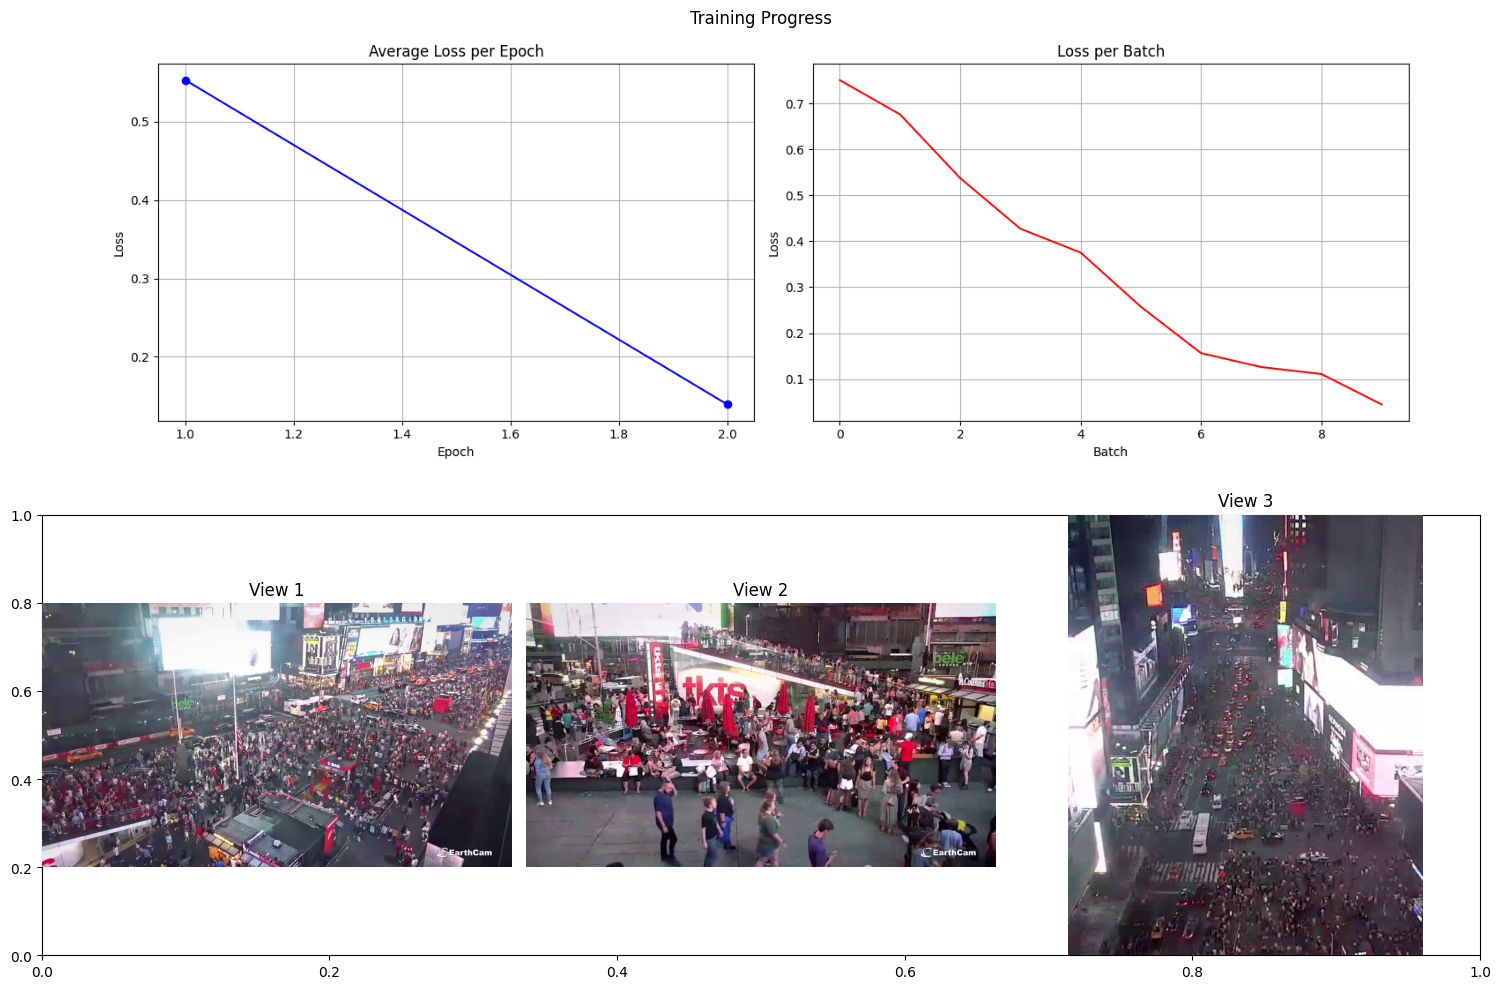


Training Summary:
--------------------------------------------------
Reading log file: training_20250303_143506.log
No loss values found in the log file

Model Configuration:
--------------------------------------------------
data_dir: Multi-view high-density anomalous crowd
batch_size: 2
sequence_length: 2
num_epochs: 2
learning_rate: 0.001
device: cpu
checkpoint_dir: checkpoints


C:\Users\kisho\AppData\Local\Temp\ipykernel_23760\4237892395.py:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('checkpoints/final_model.pth')


In [4]:
import os
import torch
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Create a figure for subplots
plt.figure(figsize=(15, 10))

# 1. Display training loss plot if it exists
plt.subplot(2, 1, 1)
if os.path.exists('training_loss.png'):
    img = plt.imread('training_loss.png')
    plt.imshow(img)
    plt.axis('off')
    plt.title('Training Progress')

# 2. Display sample frames
plt.subplot(2, 1, 2)
data_dir = 'Multi-view high-density anomalous crowd/1_Times_Square'
views = ['View_1', 'View_2', 'View_3']

for i, view in enumerate(views, 1):
    img_path = os.path.join(data_dir, view, 'Train')
    if os.path.exists(img_path):
        files = [f for f in os.listdir(img_path) if f.endswith(('.jpg', '.png'))]
        if files:
            img = Image.open(os.path.join(img_path, files[0]))
            plt.subplot(2, 3, i+3)  # Place in second row
            plt.imshow(np.array(img))
            plt.title(f'View {i}')
            plt.axis('off')

plt.tight_layout()
plt.show()

# 3. Print training summary with explicit loss values
print("\nTraining Summary:")
print("-" * 50)

if os.path.exists('logs'):
    log_files = [f for f in os.listdir('logs') if f.endswith('.log')]
    if log_files:
        latest_log = max(log_files, key=lambda x: os.path.getctime(os.path.join('logs', x)))
        print(f"Reading log file: {latest_log}")
        
        with open(os.path.join('logs', latest_log), 'r') as f:
            lines = f.readlines()
            
            # Extract and display loss values
            losses = []
            for line in lines:
                if "Loss:" in line:
                    losses.append(float(line.split("Loss:")[-1].strip()))
                    print(line.strip())
            
            if losses:
                print("\nLoss Summary:")
                print(f"Initial Loss: {losses[0]:.4f}")
                print(f"Final Loss: {losses[-1]:.4f}")
                print(f"Loss Improvement: {((losses[0] - losses[-1])/losses[0])*100:.2f}%")
            else:
                print("No loss values found in the log file")
else:
    print("No log files found")

# 4. Display model information
if os.path.exists('checkpoints/final_model.pth'):
    checkpoint = torch.load('checkpoints/final_model.pth')
    print("\nModel Configuration:")
    print("-" * 50)
    for key, value in checkpoint['config'].items():
        print(f"{key}: {value}")
else:
    print("\nNo model checkpoint found")